# 1. Описание задачи
К нам обратился клиент, который занимается сборкой и продажей персональных
компьютеров (за исключением мини-ПК и моноблоков). В связи с ростом
популярности интернет-магазинов
за последние несколько лет, а также с целью привлечения большего числа
клиентов при одновременном снижении затрат на содержание собственного
магазина, доставку и рекламу товаров на 10% он планирует выйти на онлайнрынок в ближайшие 3 месяца. В связи с этим клиент хотел бы узнать, от чего
зависит цена, а также популярность персональных компьютеров, выкладываемых
на онлайн-площадках, чтобы в дальнейшем планировать к сборке востребованные
по техническим характеристикам компьютеры и продавать их по конкурентной
цене.
Специалистом по сбору данных были выгружены датасеты с одного из
популярных онлайн-магазинов, содержащие информацию о товарах категории
«Компьютеры и моноблоки».
Проанализируйте полученные данные и представьте аналитический отчет,
содержащий выводы и рекомендации для Заказчика, которые помогут ему для
решения его бизнес-задач.

Необходимо проанализировать цены конкурентов, а также наиболее
популярные комплектующие, продаваемые в составе персональных компьютеров.

# 2. Изучение данных

### 2.1. Импорт необходимых для анализа библиотек

In [1]:
# импортируем pandas - основную библиотеку аналитика данных
import pandas as pd
# импортируем библиотеку numpy для возможных расчетов
import numpy as np
# импортируем модуль json для распаковки структур данных формата json
import json
# импортируем статистические библиотеки
import scipy
import scipy.stats as stats
# импортируем модуль pyplot из библиотеки matplotlib для визуализации
from matplotlib import pyplot as plt
# импортируем библиотеку seaborn для визуализации
import seaborn as sns
import re

### 2.2. Загрузка данных

In [2]:
df = pd.read_csv("wb_pc_hard.csv")

### 2.3. Обзор набора данных

In [3]:
df.head()

,product_id,title,price,sales,feedbacks,seller,seller_rating,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система,Гарантийный срок,Страна производства,Габариты товара,Габариты товара (с упаковкой)
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805₽,Купили более 400 раз,7 отзывов,NaN,NaN,"{'Процессор_тип': 'Intel Celeron', 'Количество...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel HD Graphics,отсутствует,3года,Россия,"{'Ширина предмета': '28.5 см', 'Глубина предме...","{'Длина упаковки': '43.5 см', 'Ширина упаковки..."
1,17877962,Системный блок,32900₽,NaN,0 отзывов,NaN,NaN,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,Китай,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '43 см', 'Ширина упаковки':..."
2,17880420,Компьютер Hp Prodesk 400 g6 mt,35720₽,NaN,0 отзывов,NaN,NaN,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,NaN,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': None, 'Ширина упаковки': No..."
3,19347937,Офисный Компьютер Robotcomp Казначей V1,39237₽,Купили более 10 раз,1 отзыв,Robotcomp,4.7,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel UHD Graphics 630,windows пробная,3 Года (36 месяцев),Россия,"{'Ширина предмета': '28 см', 'Глубина предмета...","{'Длина упаковки': '60 см', 'Ширина упаковки':..."
4,19348951,Игровой Компьютер Robotcomp М16 2.0 V1,76188₽,Купили более 200 раз,94 отзыва,Robotcomp,4.7,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1660,windows пробная,3 Года (36 месяцев),Россия,"{'Ширина предмета': '20 см', 'Глубина предмета...","{'Длина упаковки': '50 см', 'Ширина упаковки':..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     4500 non-null   int64  
 1   title                          4500 non-null   object 
 2   price                          4499 non-null   object 
 3   sales                          1164 non-null   object 
 4   feedbacks                      4500 non-null   object 
 5   seller                         4391 non-null   object 
 6   seller_rating                  4389 non-null   float64
 7   Процессор                      4500 non-null   object 
 8   Оперативная память             4500 non-null   object 
 9   Жесткий диск                   4500 non-null   object 
 10  Видеопроцессор                 4500 non-null   object 
 11  Операционная система           4500 non-null   object 
 12  Гарантийный срок               2648 non-null   o

Из краткой выжимки видно, что всего в датасете 4500 записей.

### 2.4. Выявление проблем

**Проблемы**
1. Наличие большого количества незаполненных значений в столбцах.
2. Наличие вложенных значений.
3. Количественные признаки, выраженные в строковом формате.
4. Наличие данных, не представляющих ценности в рамках решаемой задачи.

# 3. Предобработка данных

### 3.1. Исключение признаков, не представляющих ценности для задачи

In [5]:
df_copy = df.copy()
df_copy.columns

Index(['product_id', 'title', 'price', 'sales', 'feedbacks', 'seller',
       'seller_rating', 'Процессор', 'Оперативная память', 'Жесткий диск',
       'Видеопроцессор', 'Операционная система', 'Гарантийный срок',
       'Страна производства', 'Габариты товара',
       'Габариты товара (с упаковкой)'],
      dtype='object')

In [6]:
unuseful_col = ['Габариты товара', 'Габариты товара (с упаковкой)']
df_copy.drop(columns = unuseful_col, inplace = True)

In [7]:
df_copy.columns

Index(['product_id', 'title', 'price', 'sales', 'feedbacks', 'seller',
       'seller_rating', 'Процессор', 'Оперативная память', 'Жесткий диск',
       'Видеопроцессор', 'Операционная система', 'Гарантийный срок',
       'Страна производства'],
      dtype='object')

In [8]:
df_copy.columns = ['product_id', 'title', 'price', 'sales', 'feedbacks', 'seller',
                   'seller_rating', 'cpu', 'ram', 'hdd',
                   'gpu', 'os', 'guaranty',
                   'manufacturer_country']

### 3.2. Проверка и исключение дубликатов

In [9]:
df_copy.duplicated().sum()

490

In [10]:
# Проверка дубликатов по столбцу 
df_copy.duplicated(subset = 'product_id').sum()

490

In [11]:
df_copy.drop_duplicates(inplace = True)

In [12]:
df_copy.duplicated(subset = 'product_id').sum()

0

### 3.3. Обзор пропущенных значений

In [13]:
df_copy.isna().sum()

product_id                 0
title                      0
price                      1
sales                   2975
feedbacks                  0
seller                    96
seller_rating             97
cpu                        0
ram                        0
hdd                        0
gpu                        0
os                         0
guaranty                1644
manufacturer_country    1686
dtype: int64

In [14]:
df_copy['price'].unique()

array(['10805₽', '32900₽', '35720₽', ..., '21988₽', '4219₽', '77250₽'],
      dtype=object)

In [15]:
df_copy['sales'].unique()

array(['Купили более 400 раз', nan, 'Купили более 10 раз',
       'Купили более 200 раз', 'Купили более 40 раз',
       'Купили более 5 раз', 'Купили более 30 раз', 'Купили более 20 раз',
       'Купили более 50 раз', 'Купили менее 5 раз',
       'Купили более 500 раз', 'Купили более 100 раз',
       'Купили более 80 раз', 'Купили более 800 раз',
       'Купили более 90 раз', 'Купили более 300 раз',
       'Купили более 60 раз', 'Купили более 70 раз',
       'Купили более 5\xa0200 раз'], dtype=object)

In [16]:
df_copy['seller'].unique()

array([nan, 'Robotcomp', 'Market-77.ru', 'AXXES', 'САТЕЛЛИТ', 'Flash-ca',
       'Фотосклад', 'Roo24.ru', 'Innopax', 'koiko', 'Кравец А. С.',
       'Карасёв Максим Павлович', 'TERABYTE', 'Позитроника',
       'Chip computers', 'Кравец С. П.', 'Гудилина И. А.', 'OptZone',
       'FUTUREMAG', 'ПопШоп', 'KiBor', 'Семенова Н. С.', 'Zipov',
       'Клеткин В. Д.', 'Бесшумный Компьютер', 'mrm-power', 'BeastPC',
       'Техноцентр', 'Удачный Подарок', 'FLAMEFOX', 'Droid-box.ru',
       'Пелевин В. В.', 'TOPIFY', 'Неупокоев Михаил Михайлович',
       'Electronics51', 'DIY Light with ppfd.kz', 'smartkkt', 'Эстуаль',
       'Компьютерс', 'ABS-TECHNO.RU', 'GENERAL MICROWAVE', 'TINAVINA',
       'votmarket', 'Мир Репитеров', 'Acs Shop', 'TopSpare', 'ЗЕОН',
       'MERKA', 'АБР Технолоджи', 'GIGAMART', 'ScanerAvto', 'Мингалёв',
       'МИР', 'Товары для дома', 'Rus-Shop', 'Buchok', 'Русаков М. В.',
       'STPOSKZ', 'XEON STORE', 'РЕТ - компьютерный супермаркет', 'DECK',
       'RgCom', '4T-Comput

In [17]:
df_copy['seller_rating'].unique()

array([nan, 4.7, 4.3, 0. , 4.6, 4.4, 4.1, 3.4, 4.2, 5. , 4. , 3.8, 4.8,
       4.9, 3.1, 4.5, 3.7, 1.5, 3.5, 3.9, 3.3, 3.6, 3. ])

In [18]:
df_copy['guaranty'].unique()

array(['3года', nan, '3 Года (36 месяцев)', '6 мес.', '6 мес', '3 года',
       '36 мес', '1 (один) год', '36 месяцев', '12 месяцев,', '24 мес',
       '12 месяцев', '12 мес', '1 год', '7 дней', '1 год ( 12 месяцев )',
       '3 мес', '30 дней', '24 месяца', '12 мес.', '2 года', '6 месяцев',
       '36 мес.', '12', '3 месяца', '1', '14 дней', '365; дней',
       '1 год; 12 мес', '1 год; 12 месяцев', '1 месяц', '2 месяца',
       '12 месяцев от King Komp', '12 месяцев от KING KOMP',
       '1 год (12 месяцев)'], dtype=object)

In [19]:
df_copy['manufacturer_country'].unique()

array(['Россия', 'Китай', nan, 'США', 'Франция', 'Тайвань', 'Малайзия',
       'Япония', 'Швейцария', 'Вьетнам', 'Беларусь'], dtype=object)

Обзор пропущенных значений по признакам:
1. price - скорее всего, по ошибке, была пропущена цена одного из товаров. Восстановить значение не получится, удалим.
2. sales - отсутствует информация о том, что товар был куплен ни разу, из-за этого и присутствуют пропуски. Значения колонок будут приведены к числовому типу, пропущенные ячейки будут заполнены.
3. seller - об отсутствующих продавцах трудно будет что-то сказать, но так как в условии явно не было сказано о удалении неизвестных продавцов, и в задаче анализу подвергаются компьютеры, пропуски заполнятся.
4. seller_rating - данные об отсутствующем рейтинге продавца будут важны при анализе популярности различных конфигураций ПК, поэтому отсутствующие значения будут удалены.
5. guaranty - исходя из набора значений, его отсутствие означает отсутствие гарантии. Пропуски будут заполнены.
6. manufacturer_country - отсутствующие данные о стране производителе ПК будут удалены.

### 3.4. Предобработка данных из колонок

#### 3.4.1. 'price'

In [20]:
df_copy.dropna(subset=['price'], inplace=True)
df_copy.isna().sum()

product_id                 0
title                      0
price                      0
sales                   2975
feedbacks                  0
seller                    96
seller_rating             97
cpu                        0
ram                        0
hdd                        0
gpu                        0
os                         0
guaranty                1644
manufacturer_country    1685
dtype: int64

In [21]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4009 entries, 0 to 4499
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            4009 non-null   int64  
 1   title                 4009 non-null   object 
 2   price                 4009 non-null   object 
 3   sales                 1034 non-null   object 
 4   feedbacks             4009 non-null   object 
 5   seller                3913 non-null   object 
 6   seller_rating         3912 non-null   float64
 7   cpu                   4009 non-null   object 
 8   ram                   4009 non-null   object 
 9   hdd                   4009 non-null   object 
 10  gpu                   4009 non-null   object 
 11  os                    4009 non-null   object 
 12  guaranty              2365 non-null   object 
 13  manufacturer_country  2324 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 469.8+ KB


#### 3.4.2. 'sales'

In [22]:
indexes_to_drop = df_copy[df_copy['sales'] == 'Купили более 5\xa0200 раз'].index
df_copy.drop(indexes_to_drop, inplace=True)

In [23]:
df_copy['sales'].unique()

array(['Купили более 400 раз', nan, 'Купили более 10 раз',
       'Купили более 200 раз', 'Купили более 40 раз',
       'Купили более 5 раз', 'Купили более 30 раз', 'Купили более 20 раз',
       'Купили более 50 раз', 'Купили менее 5 раз',
       'Купили более 500 раз', 'Купили более 100 раз',
       'Купили более 80 раз', 'Купили более 800 раз',
       'Купили более 90 раз', 'Купили более 300 раз',
       'Купили более 60 раз', 'Купили более 70 раз'], dtype=object)

In [24]:
df_copy['sales_num'] = (df_copy['sales']
                        .str.extract(r'(\d+)')  # извлекаем первое число
                        .fillna(0)              # заменяем NaN на 0
                        .astype(int)            # преобразуем в целое число
)

In [25]:
df_copy.head()

,product_id,title,price,sales,feedbacks,seller,seller_rating,cpu,ram,hdd,gpu,os,guaranty,manufacturer_country,sales_num
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805₽,Купили более 400 раз,7 отзывов,NaN,NaN,"{'Процессор_тип': 'Intel Celeron', 'Количество...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel HD Graphics,отсутствует,3года,Россия,400
1,17877962,Системный блок,32900₽,NaN,0 отзывов,NaN,NaN,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,Китай,0
2,17880420,Компьютер Hp Prodesk 400 g6 mt,35720₽,NaN,0 отзывов,NaN,NaN,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,NaN,0
3,19347937,Офисный Компьютер Robotcomp Казначей V1,39237₽,Купили более 10 раз,1 отзыв,Robotcomp,4.7,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel UHD Graphics 630,windows пробная,3 Года (36 месяцев),Россия,10
4,19348951,Игровой Компьютер Robotcomp М16 2.0 V1,76188₽,Купили более 200 раз,94 отзыва,Robotcomp,4.7,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1660,windows пробная,3 Года (36 месяцев),Россия,200


In [26]:
df_copy.drop(columns = 'sales', inplace = True)

In [27]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4008 entries, 0 to 4499
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            4008 non-null   int64  
 1   title                 4008 non-null   object 
 2   price                 4008 non-null   object 
 3   feedbacks             4008 non-null   object 
 4   seller                3912 non-null   object 
 5   seller_rating         3911 non-null   float64
 6   cpu                   4008 non-null   object 
 7   ram                   4008 non-null   object 
 8   hdd                   4008 non-null   object 
 9   gpu                   4008 non-null   object 
 10  os                    4008 non-null   object 
 11  guaranty              2365 non-null   object 
 12  manufacturer_country  2323 non-null   object 
 13  sales_num             4008 non-null   int32  
dtypes: float64(1), int32(1), int64(1), object(11)
memory usage: 454.0+ KB


In [28]:
df_copy['sales_num'].unique()

array([400,   0,  10, 200,  40,   5,  30,  20,  50, 500, 100,  80, 800,
        90, 300,  60,  70])

#### 3.4.3. 'seller'

In [29]:
df_copy.dropna(subset = ['seller'], inplace = True)

In [30]:
df_copy['seller'].unique()

array(['Robotcomp', 'Market-77.ru', 'AXXES', 'САТЕЛЛИТ', 'Flash-ca',
       'Фотосклад', 'Roo24.ru', 'Innopax', 'koiko', 'Кравец А. С.',
       'Карасёв Максим Павлович', 'TERABYTE', 'Позитроника',
       'Chip computers', 'Кравец С. П.', 'Гудилина И. А.', 'OptZone',
       'FUTUREMAG', 'ПопШоп', 'KiBor', 'Семенова Н. С.', 'Zipov',
       'Клеткин В. Д.', 'Бесшумный Компьютер', 'mrm-power', 'BeastPC',
       'Техноцентр', 'Удачный Подарок', 'FLAMEFOX', 'Droid-box.ru',
       'Пелевин В. В.', 'TOPIFY', 'Неупокоев Михаил Михайлович',
       'Electronics51', 'DIY Light with ppfd.kz', 'smartkkt', 'Эстуаль',
       'Компьютерс', 'ABS-TECHNO.RU', 'GENERAL MICROWAVE', 'TINAVINA',
       'votmarket', 'Мир Репитеров', 'Acs Shop', 'TopSpare', 'ЗЕОН',
       'MERKA', 'АБР Технолоджи', 'GIGAMART', 'ScanerAvto', 'Мингалёв',
       'МИР', 'Товары для дома', 'Buchok', 'Русаков М. В.', 'STPOSKZ',
       'XEON STORE', 'РЕТ - компьютерный супермаркет', 'DECK', 'RgCom',
       '4T-Computer Store', 'АйТи-

#### 3.4.4. 'seller_rating'

In [31]:
df_copy.dropna(subset = ['seller_rating'], inplace = True)

In [32]:
df_copy['seller_rating'].unique()

array([4.7, 4.3, 0. , 4.6, 4.4, 4.1, 3.4, 4.2, 5. , 4. , 3.8, 4.8, 4.9,
       3.1, 4.5, 3.7, 1.5, 3.5, 3.9, 3.3, 3.6, 3. ])

#### 3.4.5. 'manufacturer_country'

In [33]:
df_copy.dropna(subset = ['manufacturer_country'], inplace = True)

In [34]:
df_copy['manufacturer_country'].unique()

array(['Россия', 'Китай', 'США', 'Франция', 'Тайвань', 'Малайзия',
       'Япония', 'Швейцария', 'Вьетнам', 'Беларусь'], dtype=object)

#### 3.4.6. 'guaranty'

In [35]:
# Функция для преобразования в компактный формат
def guaranty_to_period(text):
    if pd.isna(text):
        return "0"
    
    text = str(text).lower()
    text = text.replace('(', '').replace(')', '').replace(',', '').replace(';', '').strip()
    
    # Извлекаем все числа из строки
    numbers = [int(s) for s in text.split() if s.isdigit()]
    if not numbers:
        return np.nan
    num = numbers[0]  # берём первое найденное число
    
    # Определяем период с приоритетом для лет
    if 'год' in text or 'лет' in text:
        return f"{num}y"
    elif 'мес' in text or 'месяц' in text:
        if num >= 12:
            return f"{num // 12}y"
        else: return f"{num}m"
    elif 'дн' in text or 'дней' in text:
        if num == 365:
            return "1y"
        else: return f"{num}d"
    else:
        return np.nan

# Применяем функцию
df_copy['guaranty_period'] = df_copy['guaranty'].apply(guaranty_to_period)

# Удаляем строки с неудачными преобразованиями (например, "12", "1")
df_copy.dropna(subset=['guaranty_period'], inplace=True)

# Проверяем результат
df_copy['guaranty_period'].unique()

array(['3y', '6m', '0', '1y', '2y', '7d', '3m', '30d', '1m', '2m'],
      dtype=object)

In [36]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2235 entries, 3 to 4483
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            2235 non-null   int64  
 1   title                 2235 non-null   object 
 2   price                 2235 non-null   object 
 3   feedbacks             2235 non-null   object 
 4   seller                2235 non-null   object 
 5   seller_rating         2235 non-null   float64
 6   cpu                   2235 non-null   object 
 7   ram                   2235 non-null   object 
 8   hdd                   2235 non-null   object 
 9   gpu                   2235 non-null   object 
 10  os                    2235 non-null   object 
 11  guaranty              1880 non-null   object 
 12  manufacturer_country  2235 non-null   object 
 13  sales_num             2235 non-null   int32  
 14  guaranty_period       2235 non-null   object 
dtypes: float64(1), int32(1), i

In [37]:
df_copy.drop(columns = 'guaranty', inplace = True)

In [38]:
df_copy.head()

,product_id,title,price,feedbacks,seller,seller_rating,cpu,ram,hdd,gpu,os,manufacturer_country,sales_num,guaranty_period
3,19347937,Офисный Компьютер Robotcomp Казначей V1,39237₽,1 отзыв,Robotcomp,4.7,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel UHD Graphics 630,windows пробная,Россия,10,3y
4,19348951,Игровой Компьютер Robotcomp М16 2.0 V1,76188₽,94 отзыва,Robotcomp,4.7,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1660,windows пробная,Россия,200,3y
5,19355097,Игровой Компьютер Robotcomp M-16 V1,55625₽,12 отзывов,Robotcomp,4.7,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1650,windows пробная,Россия,40,3y
7,19358744,Игровой Компьютер Robotcomp Анаконда 2.0 V1,128284₽,4 отзыва,Robotcomp,4.7,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce RTX 3070,windows пробная,Россия,5,3y
8,19364495,Игровой Компьютер Robotcomp F22 Raptor V1,48386₽,9 отзывов,Robotcomp,4.7,"{'Процессор_тип': 'Intel Core i3', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1650,windows пробная,Россия,30,3y


In [39]:
df_copy.reset_index(drop=True, inplace=True)

In [40]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            2235 non-null   int64  
 1   title                 2235 non-null   object 
 2   price                 2235 non-null   object 
 3   feedbacks             2235 non-null   object 
 4   seller                2235 non-null   object 
 5   seller_rating         2235 non-null   float64
 6   cpu                   2235 non-null   object 
 7   ram                   2235 non-null   object 
 8   hdd                   2235 non-null   object 
 9   gpu                   2235 non-null   object 
 10  os                    2235 non-null   object 
 11  manufacturer_country  2235 non-null   object 
 12  sales_num             2235 non-null   int32  
 13  guaranty_period       2235 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(11)
memory usage: 235.9+ KB


### 3.5. Работа с вложенными структурами данных

#### 3.5.1. 'cpu'

In [41]:
df_copy['cpu'][0]

"{'Процессор_тип': 'Intel Core i5', 'Количество ядер процессора': '6'}"

In [42]:
df_copy['cpu_dict'] = df_copy['cpu'].apply(lambda x: json.loads(x.replace("'", '"')))

df_copy['cpu_type'] = df_copy['cpu_dict'].apply(lambda x: x.get('Процессор_тип'))
df_copy['cpu_cores'] = df_copy['cpu_dict'].apply(lambda x: x.get('Количество ядер процессора'))

df_copy.drop(columns = ['cpu', 'cpu_dict'], inplace=True)

df_copy.head()

,product_id,title,price,feedbacks,seller,seller_rating,ram,hdd,gpu,os,manufacturer_country,sales_num,guaranty_period,cpu_type,cpu_cores
0,19347937,Офисный Компьютер Robotcomp Казначей V1,39237₽,1 отзыв,Robotcomp,4.7,"{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel UHD Graphics 630,windows пробная,Россия,10,3y,Intel Core i5,6
1,19348951,Игровой Компьютер Robotcomp М16 2.0 V1,76188₽,94 отзыва,Robotcomp,4.7,"{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1660,windows пробная,Россия,200,3y,Intel Core i5,6
2,19355097,Игровой Компьютер Robotcomp M-16 V1,55625₽,12 отзывов,Robotcomp,4.7,"{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1650,windows пробная,Россия,40,3y,Intel Core i5,6
3,19358744,Игровой Компьютер Robotcomp Анаконда 2.0 V1,128284₽,4 отзыва,Robotcomp,4.7,"{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce RTX 3070,windows пробная,Россия,5,3y,Intel Core i5,10
4,19364495,Игровой Компьютер Robotcomp F22 Raptor V1,48386₽,9 отзывов,Robotcomp,4.7,"{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1650,windows пробная,Россия,30,3y,Intel Core i3,4


In [43]:
df_copy['cpu_type'].unique()

array(['Intel Core i5', 'Intel Core i3', 'AMD Ryzen 5', 'AMD Athlon',
       'Intel Core i7', 'Intel Core i9', 'AMD Ryzen 3',
       'Gemini Lake Refresh J4115', 'не заполнено',
       'Gemini Lake Refresh J4125', 'Intel Core 12400F',
       'Gemini Lake Refresh Processor J4125', 'Intel J4125', 'Intel',
       'Intel Xeon', '6010', '12400f', 'Intel Pentium', 'AMD A6',
       '8 ядер', 'Intel J3455', 'N3350', '4 ядра intel', 'Intel 4 ядра',
       'Intel Atom x5-Z8500', 'Intel Celeron',
       'Intel Apollo Lake J3355 Dual-Core (2 ГГц)', 'AMD E1-6010',
       'Intel N5095', 'AMD RYZEN 4600g Vega7 арт. 100343717',
       'Intel Processor N5095', 'Встроенный intel J3160 - core 1.5 ГГц',
       'Intel Z8350 4 ядра 1,92 ГГц 64 бита', 'Intel N5105',
       'AMD RYZEN 4600g Vega7 арт. 143553804', 'AMD Ryzen 9',
       'AMD Ryzen 7', 'A10-5800KRAM', 'AMD FX-4300', 'AMD FX-6100',
       'Intеl Quad Q9400', 'Intеl Quad 9400', 'Intel E5',
       'Intel Core Quad 9400', 'Intel E3', 'AMD Radeon RX 

In [44]:
df_copy['cpu_type'] = df_copy['cpu_type'].str.strip().str.lower()
# Замена некорректных написаний брендов
brand_replacements = {
    'intel': 'intel',
    'amd': 'amd',
    'рязань': 'ryzen',  # Исправление опечатки
    'intеl': 'intel',    # Исправление кириллической 'е'
    'arm': 'arm'
}

# Стандартизация моделей процессоров
model_replacements = {
    'core i': 'core i',
    'xeon': 'xeon',
    'pentium': 'pentium',
    'celeron': 'celeron',
    'athlon': 'athlon',
    'ryzen': 'ryzen',
    'apollo lake': 'apollo lake',
    'gemini lake': 'gemini lake'
}

def standardize_cpu_name(cpu):
    if pd.isna(cpu) or cpu == 'не заполнено':
        return np.nan
    
    # Замена брендов
    for wrong, correct in brand_replacements.items():
        cpu = cpu.replace(wrong, correct)
    
    # Стандартизация моделей
    for pattern, replacement in model_replacements.items():
        if pattern in cpu:
            cpu = cpu.replace(pattern, replacement)
    
    # Удаление технических характеристик (ГГц, ядер и т.д.)
    cpu = re.sub(r'[\d,]+ гц', '', cpu)
    cpu = re.sub(r'\d+-ядерный', '', cpu)
    cpu = re.sub(r'\d+ ядра', '', cpu)
    cpu = re.sub(r'\d+ бита', '', cpu)
    cpu = re.sub(r'арт\. \d+', '', cpu)
    cpu = re.sub(r'встроенный', '', cpu)
    
    # Удаление лишних пробелов и дефисов
    cpu = re.sub(r'\s+', ' ', cpu).strip()
    cpu = re.sub(r'\s*-\s*', ' ', cpu)
    
    return cpu

df_copy['cpu_type_clean'] = df_copy['cpu_type'].apply(standardize_cpu_name)

In [45]:
df_copy['cpu_type_clean'].unique()

array(['intel core i5', 'intel core i3', 'amd ryzen 5', 'amd athlon',
       'intel core i7', 'intel core i9', 'amd ryzen 3',
       'gemini lake refresh j4115', nan, 'gemini lake refresh j4125',
       'intel core 12400f', 'gemini lake refresh processor j4125',
       'intel j4125', 'intel', 'intel xeon', '6010', '12400f',
       'intel pentium', 'amd a6', '8 ядер', 'intel j3455', 'n3350',
       'intel atom x5 z8500', 'intel celeron',
       'intel apollo lake j3355 dual core (2 ггц)', 'amd e1 6010',
       'intel n5095', 'amd ryzen 4600g vega7', 'intel processor n5095',
       'intel j3160 core 1.5 ггц', 'intel z8350 1,92 ггц', 'intel n5105',
       'amd ryzen 9', 'amd ryzen 7', 'a10 5800kram', 'amd fx 4300',
       'amd fx 6100', 'intel quad q9400', 'intel quad 9400', 'intel e5',
       'intel core quad 9400', 'intel e3', 'amd radeon rx 570', 'q9400',
       'intel quad', 'ryzen; 3 1300x', 'intel j1800 2,0 ghz quad core',
       'amd ryzen 5 4650', 'arm cortex a53'], dtype=object)

In [46]:
df_copy.dropna(subset=['cpu_type_clean'], inplace=True)
df_copy.reset_index(drop=True, inplace=True)

In [47]:
# Создаем категории для основных линеек процессоров
def categorize_cpu(cpu):
    if not cpu:
        return 'other'
    
    cpu = cpu.lower()
    
    if 'core i3' in cpu:
        return 'Intel Core i3'
    elif ('core i5' in cpu or '12400' in cpu):
        return 'Intel Core i5'
    elif 'core i7' in cpu:
        return 'Intel Core i7'
    elif 'core i9' in cpu:
        return 'Intel Core i9'
    elif 'ryzen 3' in cpu:
        return 'AMD Ryzen 3'
    elif 'ryzen 5' in cpu:
        return 'AMD Ryzen 5'
    elif 'ryzen 7' in cpu:
        return 'AMD Ryzen 7'
    elif 'ryzen 9' in cpu:
        return 'AMD Ryzen 9'
    elif ('xeon' in cpu or 'e5' in cpu):
        return 'Intel Xeon'
    elif 'pentium' in cpu:
        return 'Intel Pentium'
    elif ('celeron' in cpu or 'n5095' in cpu or 'j' in cpu):
        return 'Intel Celeron'
    elif 'athlon' in cpu:
        return 'AMD Athlon'
    elif 'arm' in cpu:
        return 'ARM Cortex'
    elif 'gemini' in cpu:
        return 'Intel Gemini Lake'
    elif 'apollo' in cpu:
        return 'Intel Apollo Lake'
    elif ('quad' in cpu or '9400' in cpu):
        return 'Intel Quad'
    elif 'e1' in cpu:
        return 'AMD E1'
    elif 'a10' in cpu:
        return 'AMD A10'
    elif 'a6' in cpu:
        return 'AMD A6'
    elif ('atom' in cpu or 'z8350' in cpu or 'z8500' in cpu):
        return 'Intel Atom'
    elif 'fx' in cpu:
        return 'AMD FX'
    elif 'intel' in cpu:
        return 'other Intel cpu'
    else:
        return 'other'

df_copy['cpu_category'] = df_copy['cpu_type_clean'].apply(categorize_cpu)

print(df_copy['cpu_category'].value_counts())

cpu_category
Intel Core i5      515
Intel Core i3      388
AMD Ryzen 5        334
Intel Core i7      201
Intel Xeon          97
AMD Athlon          67
Intel Celeron       48
AMD A6              37
other Intel cpu     32
AMD Ryzen 3         20
Intel Quad          19
Intel Atom          18
Intel Pentium       16
Intel Core i9       13
other                8
AMD Ryzen 9          4
AMD Ryzen 7          3
AMD FX               3
AMD A10              1
AMD E1               1
ARM Cortex           1
Name: count, dtype: int64


In [48]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            1826 non-null   int64  
 1   title                 1826 non-null   object 
 2   price                 1826 non-null   object 
 3   feedbacks             1826 non-null   object 
 4   seller                1826 non-null   object 
 5   seller_rating         1826 non-null   float64
 6   ram                   1826 non-null   object 
 7   hdd                   1826 non-null   object 
 8   gpu                   1826 non-null   object 
 9   os                    1826 non-null   object 
 10  manufacturer_country  1826 non-null   object 
 11  sales_num             1826 non-null   int32  
 12  guaranty_period       1826 non-null   object 
 13  cpu_type              1826 non-null   object 
 14  cpu_cores             1826 non-null   object 
 15  cpu_type_clean       

In [49]:
df_copy.drop(columns = ['cpu_type', 'cpu_type_clean'], inplace=True)

In [50]:
df_copy['cpu_cores'].value_counts()

cpu_cores
6               687
4               456
2               145
4 ядра          136
10              100
12               72
8 ядер           66
24 ядра          60
8                37
не заполнено     37
16               15
20                7
14                4
6 ядер            2
2 шт              2
Name: count, dtype: int64

In [51]:
# Функция для извлечения числа ядер
def extract_cores(value):
    if pd.isna(value) or str(value).strip().lower() == 'не заполнено':
        return np.nan
    
    # Извлекаем первое число из строки
    numbers = [int(s) for s in str(value).split() if s.isdigit()]
    return numbers[0] if numbers else np.nan

# Применяем функцию
df_copy['cpu_cores'] = df_copy['cpu_cores'].apply(extract_cores)

# Удаляем строки с NaN (включая "не заполнено")
df_copy.dropna(subset=['cpu_cores'], inplace=True)

# Преобразуем в целые числа
df_copy['cpu_cores'] = df_copy['cpu_cores'].astype(int)

In [52]:
df_copy['cpu_cores'].value_counts()

cpu_cores
6     689
4     592
2     147
8     103
10    100
12     72
24     60
16     15
20      7
14      4
Name: count, dtype: int64

#### 3.5.2. 'ram'

In [53]:
df_copy['ram'][0]

"{'Тип оперативной памяти': 'DDR 4', 'Объем оперативной памяти (Гб)': '8'}"

In [54]:
# Функция для безопасного извлечения данных
def parse_ram(ram_str):
    try:
        # Пробуем заменить кавычки и распарсить JSON
        data = json.loads(ram_str.replace("'", '"'))
        return (
            data.get('Тип оперативной памяти'),
            data.get('Объем оперативной памяти (Гб)')
        )
    except:
        return (None, None)

# Применяем функцию и создаем колонки
df_copy[['ram_type', 'ram_storage']] = pd.DataFrame(
    df_copy['ram'].apply(parse_ram).tolist(),
    index=df_copy.index
)

# Удаляем строки, где не распарсились оба значения
df_copy.dropna(subset=['ram_type', 'ram_storage'], how='all', inplace=True)

# Удаляем исходную колонку
df_copy.drop(columns=['ram'], inplace=True)

# Проверяем результат
print("Успешно обработано записей:", len(df_copy))

Успешно обработано записей: 1786


In [55]:
df_copy['ram_storage'].value_counts()

ram_storage
16       468
16 ГБ    329
32       231
8        177
8 ГБ     168
32 ГБ     99
4 ГБ      83
64        63
16 Gb     60
16 гб     41
4         24
32 гб     13
8 гб       9
2          6
8 GB       3
6 ГБ       3
16ГБ       2
4 гб       2
64 ГБ      2
8Гб        1
4 GB       1
1          1
Name: count, dtype: int64

In [56]:
df_copy['ram_type'].value_counts()

ram_type
DDR 4           1389
DDR 3            308
не заполнено      71
DDR 5              9
4Gb                2
16                 2
DDR                1
SODDIM             1
16 Гб              1
4GB                1
RAM 16 ГБ          1
Name: count, dtype: int64

In [57]:
# Функция для стандартизации типа RAM
def clean_ram_type(ram):
    ram = str(ram).strip().upper()  # Приводим к верхнему регистру и удаляем пробелы
    
    # Оставляем только корректные значения DDR и SODDIM
    if ram.startswith('DDR'):
        # Извлекаем номер поколения (3, 4, 5)
        ddr_version = ''.join([c for c in ram if c.isdigit()])
        return f'DDR {ddr_version}' if ddr_version else None
    elif ram == 'SODDIM':
        return 'SODIMM'  # Стандартизируем написание
    else:
        return None  # Помечаем на удаление

# Применяем функцию
df_copy['ram_type'] = df_copy['ram_type'].apply(clean_ram_type)

# Удаляем строки с некорректными значениями (None)
df_copy.dropna(subset=['ram_type'], inplace=True)

# Проверяем результат
print("Уникальные значения после очистки:")
print(df_copy['ram_type'].value_counts())

Уникальные значения после очистки:
ram_type
DDR 4     1389
DDR 3      308
DDR 5        9
SODIMM       1
Name: count, dtype: int64


In [58]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1707 entries, 0 to 1824
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            1707 non-null   int64  
 1   title                 1707 non-null   object 
 2   price                 1707 non-null   object 
 3   feedbacks             1707 non-null   object 
 4   seller                1707 non-null   object 
 5   seller_rating         1707 non-null   float64
 6   hdd                   1707 non-null   object 
 7   gpu                   1707 non-null   object 
 8   os                    1707 non-null   object 
 9   manufacturer_country  1707 non-null   object 
 10  sales_num             1707 non-null   int32  
 11  guaranty_period       1707 non-null   object 
 12  cpu_cores             1707 non-null   int32  
 13  cpu_category          1707 non-null   object 
 14  ram_type              1707 non-null   object 
 15  ram_storage           1707

In [59]:
df_copy.reset_index(drop=True, inplace=True)

In [60]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1707 entries, 0 to 1706
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            1707 non-null   int64  
 1   title                 1707 non-null   object 
 2   price                 1707 non-null   object 
 3   feedbacks             1707 non-null   object 
 4   seller                1707 non-null   object 
 5   seller_rating         1707 non-null   float64
 6   hdd                   1707 non-null   object 
 7   gpu                   1707 non-null   object 
 8   os                    1707 non-null   object 
 9   manufacturer_country  1707 non-null   object 
 10  sales_num             1707 non-null   int32  
 11  guaranty_period       1707 non-null   object 
 12  cpu_cores             1707 non-null   int32  
 13  cpu_category          1707 non-null   object 
 14  ram_type              1707 non-null   object 
 15  ram_storage          

In [61]:
def clean_ram_storage(value):
    # Преобразуем в строку и очищаем
    value = str(value).strip().upper()
    
    # Удаляем все нецифровые символы (кроме чисел)
    digits = re.sub(r'[^\d]', '', value)
    
    # Если нет цифр - возвращаем None
    if not digits:
        return None
    
    # Преобразуем в число
    return int(digits)

# Применяем функцию
df_copy['ram_storage'] = df_copy['ram_storage'].apply(clean_ram_storage)

# Удаляем строки с некорректными значениями
df_copy.dropna(subset=['ram_storage'], inplace=True)
print(df_copy['ram_storage'].value_counts())

ram_storage
16    875
32    342
8     329
4      88
64     65
2       6
6       2
Name: count, dtype: int64


In [62]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1707 entries, 0 to 1706
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            1707 non-null   int64  
 1   title                 1707 non-null   object 
 2   price                 1707 non-null   object 
 3   feedbacks             1707 non-null   object 
 4   seller                1707 non-null   object 
 5   seller_rating         1707 non-null   float64
 6   hdd                   1707 non-null   object 
 7   gpu                   1707 non-null   object 
 8   os                    1707 non-null   object 
 9   manufacturer_country  1707 non-null   object 
 10  sales_num             1707 non-null   int32  
 11  guaranty_period       1707 non-null   object 
 12  cpu_cores             1707 non-null   int32  
 13  cpu_category          1707 non-null   object 
 14  ram_type              1707 non-null   object 
 15  ram_storage          

#### 3.5.2. 'hdd'

In [63]:
df_copy['hdd'][0]

"{'Объем накопителя HDD': None, 'Объем накопителя SSD': '480 ГБ'}"

In [64]:
def parse_storage(storage_str):
    try:
        data = json.loads(storage_str.replace("'", '"'))
        
        def clean_size(size):
            if pd.isna(size) or size is None:
                return 0.0
            size = str(size).upper()
            if 'ТБ' in size or 'TB' in size:
                size = size.replace('ТБ', '').replace('TB', '').strip()
                return int(float(size) * 1024)
            else:
                size = size.replace('ГБ', '').replace('GB', '').strip()
                return int(size) if size.isdigit() else 0.0
        
        hdd = clean_size(data.get('Объем накопителя HDD'))
        ssd = clean_size(data.get('Объем накопителя SSD'))
        
        return hdd, ssd
        
    except (json.JSONDecodeError, KeyError, TypeError):
        # Если JSON-парсинг не сработал, используем регулярные выражения
        hdd_match = re.search(r'(\d+\.?\d*)\s*(?:ГБ|TB|ТБ)', storage_str, re.IGNORECASE)
        ssd_match = re.search(r'(\d+\.?\d*)\s*(?:ГБ|TB|ТБ)', storage_str, re.IGNORECASE)
        
        hdd = int(float(hdd_match.group(1))) if hdd_match else 0.0
        ssd = int(float(ssd_match.group(1))) if ssd_match else 0.0
        
        return hdd, ssd

# Применяем функцию и создаем отдельный DataFrame
storage_df = pd.DataFrame(
    df_copy['hdd'].apply(parse_storage).tolist(),
    columns=['hdd_size_gb', 'ssd_size_gb'],
    index=df_copy.index
)

# Объединяем с исходным DataFrame
df_copy = pd.concat([df_copy, storage_df], axis=1)

# Удаляем строки, где оба накопителя не указаны
df_copy = df_copy.dropna(
    subset=['hdd_size_gb', 'ssd_size_gb'],
    how='all'
)

df_copy = df_copy[~((df_copy['hdd_size_gb'] == 0.0) & (df_copy['ssd_size_gb'] == 0.0))]

# Удаляем исходный столбец
df_copy = df_copy.drop(columns=['hdd'], errors='ignore')

# Проверяем результат
print(f"Осталось записей: {len(df_copy)}")
print("\nРаспределение HDD (ГБ):")
print(df_copy['hdd_size_gb'].value_counts().sort_index())
print("\nРаспределение SSD (ГБ):")
print(df_copy['ssd_size_gb'].value_counts().sort_index())


Осталось записей: 1351

Распределение HDD (ГБ):
hdd_size_gb
0.0        31
1.0        13
2.0        26
64.0        3
120.0      18
128.0      10
240.0     106
250.0       3
256.0      45
480.0     296
500.0     120
512.0     100
960.0     157
1000.0    321
1024.0     76
1500.0      1
2000.0     22
2048.0      3
Name: count, dtype: int64

Распределение SSD (ГБ):
ssd_size_gb
0.0         2
1.0        13
2.0        26
64.0        3
120.0      73
128.0      11
240.0     179
250.0       3
256.0     102
480.0     381
500.0      61
512.0     216
960.0     165
1000.0    105
1024.0      9
1500.0      1
2048.0      1
Name: count, dtype: int64


In [65]:
df_copy.head()

,product_id,title,price,feedbacks,seller,seller_rating,gpu,os,manufacturer_country,sales_num,guaranty_period,cpu_cores,cpu_category,ram_type,ram_storage,hdd_size_gb,ssd_size_gb
0,19347937,Офисный Компьютер Robotcomp Казначей V1,39237₽,1 отзыв,Robotcomp,4.7,Intel UHD Graphics 630,windows пробная,Россия,10,3y,6,Intel Core i5,DDR 4,8,480.0,480.0
1,19348951,Игровой Компьютер Robotcomp М16 2.0 V1,76188₽,94 отзыва,Robotcomp,4.7,NVIDIA GeForce GTX 1660,windows пробная,Россия,200,3y,6,Intel Core i5,DDR 4,16,960.0,960.0
2,19355097,Игровой Компьютер Robotcomp M-16 V1,55625₽,12 отзывов,Robotcomp,4.7,NVIDIA GeForce GTX 1650,windows пробная,Россия,40,3y,6,Intel Core i5,DDR 4,16,480.0,480.0
3,19358744,Игровой Компьютер Robotcomp Анаконда 2.0 V1,128284₽,4 отзыва,Robotcomp,4.7,NVIDIA GeForce RTX 3070,windows пробная,Россия,5,3y,10,Intel Core i5,DDR 4,16,960.0,960.0
4,19364495,Игровой Компьютер Robotcomp F22 Raptor V1,48386₽,9 отзывов,Robotcomp,4.7,NVIDIA GeForce GTX 1650,windows пробная,Россия,30,3y,4,Intel Core i3,DDR 4,16,480.0,480.0


In [66]:
df_copy['hdd_size_gb'] = df_copy['hdd_size_gb'].fillna(0)
df_copy['ssd_size_gb'] = df_copy['ssd_size_gb'].fillna(0)
print(f"Финальное количество записей: {len(df_copy)}")
print("\nРаспределение HDD (ГБ) после очистки:")
print(df_copy['hdd_size_gb'].value_counts(dropna=False).sort_index())
print("\nРаспределение SSD (ГБ) после очистки:")
print(df_copy['ssd_size_gb'].value_counts(dropna=False).sort_index())

Финальное количество записей: 1351

Распределение HDD (ГБ) после очистки:
hdd_size_gb
0.0        31
1.0        13
2.0        26
64.0        3
120.0      18
128.0      10
240.0     106
250.0       3
256.0      45
480.0     296
500.0     120
512.0     100
960.0     157
1000.0    321
1024.0     76
1500.0      1
2000.0     22
2048.0      3
Name: count, dtype: int64

Распределение SSD (ГБ) после очистки:
ssd_size_gb
0.0         2
1.0        13
2.0        26
64.0        3
120.0      73
128.0      11
240.0     179
250.0       3
256.0     102
480.0     381
500.0      61
512.0     216
960.0     165
1000.0    105
1024.0      9
1500.0      1
2048.0      1
Name: count, dtype: int64


In [67]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1351 entries, 0 to 1706
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            1351 non-null   int64  
 1   title                 1351 non-null   object 
 2   price                 1351 non-null   object 
 3   feedbacks             1351 non-null   object 
 4   seller                1351 non-null   object 
 5   seller_rating         1351 non-null   float64
 6   gpu                   1351 non-null   object 
 7   os                    1351 non-null   object 
 8   manufacturer_country  1351 non-null   object 
 9   sales_num             1351 non-null   int32  
 10  guaranty_period       1351 non-null   object 
 11  cpu_cores             1351 non-null   int32  
 12  cpu_category          1351 non-null   object 
 13  ram_type              1351 non-null   object 
 14  ram_storage           1351 non-null   int64  
 15  hdd_size_gb           1351

### 3.6. Преобразование данных в необходимый формат

In [68]:
df_copy.head()

,product_id,title,price,feedbacks,seller,seller_rating,gpu,os,manufacturer_country,sales_num,guaranty_period,cpu_cores,cpu_category,ram_type,ram_storage,hdd_size_gb,ssd_size_gb
0,19347937,Офисный Компьютер Robotcomp Казначей V1,39237₽,1 отзыв,Robotcomp,4.7,Intel UHD Graphics 630,windows пробная,Россия,10,3y,6,Intel Core i5,DDR 4,8,480.0,480.0
1,19348951,Игровой Компьютер Robotcomp М16 2.0 V1,76188₽,94 отзыва,Robotcomp,4.7,NVIDIA GeForce GTX 1660,windows пробная,Россия,200,3y,6,Intel Core i5,DDR 4,16,960.0,960.0
2,19355097,Игровой Компьютер Robotcomp M-16 V1,55625₽,12 отзывов,Robotcomp,4.7,NVIDIA GeForce GTX 1650,windows пробная,Россия,40,3y,6,Intel Core i5,DDR 4,16,480.0,480.0
3,19358744,Игровой Компьютер Robotcomp Анаконда 2.0 V1,128284₽,4 отзыва,Robotcomp,4.7,NVIDIA GeForce RTX 3070,windows пробная,Россия,5,3y,10,Intel Core i5,DDR 4,16,960.0,960.0
4,19364495,Игровой Компьютер Robotcomp F22 Raptor V1,48386₽,9 отзывов,Robotcomp,4.7,NVIDIA GeForce GTX 1650,windows пробная,Россия,30,3y,4,Intel Core i3,DDR 4,16,480.0,480.0


#### 3.6.1. 'price'

In [69]:
df_copy['price'].value_counts()

price
69079₽    10
88110₽     8
87120₽     8
70312₽     8
74626₽     8
          ..
54719₽     1
47369₽     1
30869₽     1
58649₽     1
21988₽     1
Name: count, Length: 902, dtype: int64

In [70]:
# Удаляем символ рубля и преобразуем в число
df_copy['price_rub'] = (
    df_copy['price']
    .str.replace('₽', '', regex=False)  # Удаляем символ рубля
    .str.replace(' ', '', regex=False)   # Удаляем возможные пробелы
    .astype(int)                         # Преобразуем в целое число
)

# Удаляем исходный столбец
df_copy.drop(columns=['price'], inplace=True)

# Проверяем результат
print(df_copy['price_rub'].head())

0     39237
1     76188
2     55625
3    128284
4     48386
Name: price_rub, dtype: int32


#### 3.6.2. 'feedbacks'

In [71]:
df_copy['feedbacks'].value_counts()

feedbacks
0 отзывов      918
1 отзыв        138
2 отзыва        56
4 отзыва        36
3 отзыва        33
5 отзывов       15
8 отзывов       14
7 отзывов       12
6 отзывов       11
19 отзывов      11
13 отзывов       6
11 отзывов       6
14 отзывов       6
9 отзывов        5
12 отзывов       5
47 отзывов       5
21 отзыв         5
30 отзывов       5
148 отзывов      5
17 отзывов       4
10 отзывов       4
34 отзыва        4
18 отзывов       3
84 отзыва        3
117 отзывов      3
94 отзыва        3
42 отзыва        3
54 отзыва        3
128 отзывов      3
101 отзыв        3
25 отзывов       3
189 отзывов      2
296 отзывов      2
15 отзывов       2
16 отзывов       2
66 отзывов       2
26 отзывов       2
38 отзывов       2
29 отзывов       2
77 отзывов       1
22 отзыва        1
23 отзыва        1
27 отзывов       1
Name: count, dtype: int64

In [72]:
# Извлекаем число из строки с отзывами
df_copy['feedbacks_count'] = (
    df_copy['feedbacks']
    .str.extract(r'(\d+)')  # Извлекаем только цифры
    .astype(int)            # Преобразуем в целое число
)

# Удаляем исходный столбец (по желанию)
df_copy.drop(columns=['feedbacks'], inplace=True)

# Проверяем результат
print("Распределение количества отзывов:")
print(df_copy['feedbacks_count'].value_counts().sort_index())

Распределение количества отзывов:
feedbacks_count
0      918
1      138
2       56
3       33
4       36
5       15
6       11
7       12
8       14
9        5
10       4
11       6
12       5
13       6
14       6
15       2
16       2
17       4
18       3
19      11
21       5
22       1
23       1
25       3
26       2
27       1
29       2
30       5
34       4
38       2
42       3
47       5
54       3
66       2
77       1
84       3
94       3
101      3
117      3
128      3
148      5
189      2
296      2
Name: count, dtype: int64


In [73]:
df_copy.head()

,product_id,title,seller,seller_rating,gpu,os,manufacturer_country,sales_num,guaranty_period,cpu_cores,cpu_category,ram_type,ram_storage,hdd_size_gb,ssd_size_gb,price_rub,feedbacks_count
0,19347937,Офисный Компьютер Robotcomp Казначей V1,Robotcomp,4.7,Intel UHD Graphics 630,windows пробная,Россия,10,3y,6,Intel Core i5,DDR 4,8,480.0,480.0,39237,1
1,19348951,Игровой Компьютер Robotcomp М16 2.0 V1,Robotcomp,4.7,NVIDIA GeForce GTX 1660,windows пробная,Россия,200,3y,6,Intel Core i5,DDR 4,16,960.0,960.0,76188,94
2,19355097,Игровой Компьютер Robotcomp M-16 V1,Robotcomp,4.7,NVIDIA GeForce GTX 1650,windows пробная,Россия,40,3y,6,Intel Core i5,DDR 4,16,480.0,480.0,55625,12
3,19358744,Игровой Компьютер Robotcomp Анаконда 2.0 V1,Robotcomp,4.7,NVIDIA GeForce RTX 3070,windows пробная,Россия,5,3y,10,Intel Core i5,DDR 4,16,960.0,960.0,128284,4
4,19364495,Игровой Компьютер Robotcomp F22 Raptor V1,Robotcomp,4.7,NVIDIA GeForce GTX 1650,windows пробная,Россия,30,3y,4,Intel Core i3,DDR 4,16,480.0,480.0,48386,9


#### 3.6.3. 'os'

In [74]:
df_copy['os'].unique()

array(['windows пробная', 'Windows 10 Pro', 'Windows 10 Home',
       'Windows 10', 'Windows 10 (Trial version)', 'Windows 11',
       'отсутствует', 'Windows 11 Pro (Trial)', 'Windows 7/8/10, LINUX',
       'Windows 11 Pro', 'Windows 10 Home пробная', 'Free DOS',
       'Windows пробная версия', 'Windows 10 пробная',
       'Windows 10 Pro Trial', 'Windows 11 Home', 'windows 10',
       'Microsoft Windows 11', 'windows7/8/10, Linux, Ubuntu', 'DOS',
       'Windows', 'windows 10 trial', 'Windows 10 pro Trial',
       'WINDOWS 10', 'Без OC'], dtype=object)

In [75]:
def standardize_os(os_str):
    if pd.isna(os_str) or str(os_str).lower() in ['отсутствует', 'none', 'нет']:
        return 'No OS'
    
    os_str = str(os_str).strip()
    
    # Приводим к единому формату пробных версий
    os_str = (os_str.replace('(Trial version)', '(Trial)')
              .replace('Trial version', '(Trial)')
              .replace('пробная', '(Trial)')
              .replace('Pro Trial', 'Pro (Trial)')
              .replace('ProTrial', 'Pro (Trial)'))
    
    # Стандартизируем названия
    os_lower = os_str.lower()
    if 'windows 11 pro' in os_lower:
        return 'Windows 11 Pro' + (' (Trial)' if '(trial)' in os_lower else '')
    elif 'windows 11' in os_lower:
        return 'Windows 11' + (' (Trial)' if '(trial)' in os_lower else '')
    elif 'windows 10 pro' in os_lower:
        return 'Windows 10 Pro' + (' (Trial)' if '(trial)' in os_lower else '')
    elif 'windows 10' in os_lower:
        return 'Windows 10' + (' (Trial)' if '(trial)' in os_lower else '')
    elif 'free dos' in os_lower:
        return 'FreeDOS'
    elif 'windows' in os_lower and len(os_str.split()) == 1:
        return None  # Помечаем на удаление
    else:
        return os_str

# Применяем функцию
df_copy['os_ver'] = df_copy['os'].apply(standardize_os)

# Удаляем строки с простым "Windows" и исходный столбец
df_copy = df_copy[df_copy['os_ver'].notna()]
df_copy.drop(columns=['os'], inplace=True, errors='ignore')

# Проверяем результат
print("Стандартизированные значения ОС:")
print(df_copy['os_ver'].value_counts())
print(f"\nВсего записей осталось: {len(df_copy)}")

Стандартизированные значения ОС:
os_ver
Windows 10 Pro                  785
windows (Trial)                 214
Windows 10                      167
Windows 10 Pro (Trial)           67
FreeDOS                          37
Windows 10 (Trial)               27
No OS                            27
Windows 11                       10
Windows 11 Pro                    7
Windows 11 Pro (Trial)            2
Windows 7/8/10, LINUX             1
Windows (Trial) версия            1
windows7/8/10, Linux, Ubuntu      1
DOS                               1
Без OC                            1
Name: count, dtype: int64

Всего записей осталось: 1348


In [76]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1348 entries, 0 to 1706
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            1348 non-null   int64  
 1   title                 1348 non-null   object 
 2   seller                1348 non-null   object 
 3   seller_rating         1348 non-null   float64
 4   gpu                   1348 non-null   object 
 5   manufacturer_country  1348 non-null   object 
 6   sales_num             1348 non-null   int32  
 7   guaranty_period       1348 non-null   object 
 8   cpu_cores             1348 non-null   int32  
 9   cpu_category          1348 non-null   object 
 10  ram_type              1348 non-null   object 
 11  ram_storage           1348 non-null   int64  
 12  hdd_size_gb           1348 non-null   float64
 13  ssd_size_gb           1348 non-null   float64
 14  price_rub             1348 non-null   int32  
 15  feedbacks_count       1348

In [77]:
df_copy.head()

,product_id,title,seller,seller_rating,gpu,manufacturer_country,sales_num,guaranty_period,cpu_cores,cpu_category,ram_type,ram_storage,hdd_size_gb,ssd_size_gb,price_rub,feedbacks_count,os_ver
0,19347937,Офисный Компьютер Robotcomp Казначей V1,Robotcomp,4.7,Intel UHD Graphics 630,Россия,10,3y,6,Intel Core i5,DDR 4,8,480.0,480.0,39237,1,windows (Trial)
1,19348951,Игровой Компьютер Robotcomp М16 2.0 V1,Robotcomp,4.7,NVIDIA GeForce GTX 1660,Россия,200,3y,6,Intel Core i5,DDR 4,16,960.0,960.0,76188,94,windows (Trial)
2,19355097,Игровой Компьютер Robotcomp M-16 V1,Robotcomp,4.7,NVIDIA GeForce GTX 1650,Россия,40,3y,6,Intel Core i5,DDR 4,16,480.0,480.0,55625,12,windows (Trial)
3,19358744,Игровой Компьютер Robotcomp Анаконда 2.0 V1,Robotcomp,4.7,NVIDIA GeForce RTX 3070,Россия,5,3y,10,Intel Core i5,DDR 4,16,960.0,960.0,128284,4,windows (Trial)
4,19364495,Игровой Компьютер Robotcomp F22 Raptor V1,Robotcomp,4.7,NVIDIA GeForce GTX 1650,Россия,30,3y,4,Intel Core i3,DDR 4,16,480.0,480.0,48386,9,windows (Trial)


#### 3.6.4. 'gpu'

In [78]:
df_copy['gpu'].unique()

array(['Intel UHD Graphics 630', 'NVIDIA GeForce GTX 1660',
       'NVIDIA GeForce GTX 1650', 'NVIDIA GeForce RTX 3070',
       'NVIDIA GeForce RTX 3050', 'AMD Radeon Vega 7',
       'NVIDIA GeForce RTX 3080', 'AMD Radeon Vega 3',
       'NVIDIA GeForce RTX 3060', 'NVIDIA GeForce GT 1030',
       'intel UHD Graphics 750', 'Intel HD Graphics 6000',
       'Intel HD Graphics 600', 'AMD Radeon RX 580',
       'NVIDIA GeForce GTX 1050', 'NVIDIA GeForce RTX 2060',
       'Intel UHD Graphics 610', 'AMD Radeon R5', 'не заполнено',
       'NVIDIA', 'Intel HD Graphics 500', 'NVIDIA GeForce GT 730',
       'AMD Radeon RX 6500', 'Intel HD Graphics 4000',
       'NVIDIA GeForce GTX 1630', 'Intel HD Graphics 2000',
       'Intel UHD Graphics', 'Intel Core i5 11400F 2.6ГГц',
       'Intel Core i3 10105F 3.7ГГц', 'Intel HD Graphics',
       'Intel UHD Graphics 600', 'AMD Radeon Vega 8', 'RTX 1650 4GB',
       'UHD Graphics', 'AMD Radeon RX 6600', 'AMD Radeon RX 550',
       'AMD Radeon RX 470', 'AMD 

In [79]:
import re

def clean_gpu(gpu_str):
    if pd.isna(gpu_str) or str(gpu_str).lower() in ['не заполнено', 'none', 'нет']:
        return 'Не указано'

    gpu_str = str(gpu_str).strip().upper()

    # Удаляем лишние слова/символы
    gpu_str = re.sub(r'\s+', ' ', gpu_str)
    gpu_str = re.sub(r'[^\w\s]', '', gpu_str)

    # Убираем случайные CPU-описания
    if 'CORE I' in gpu_str or 'CELERON' in gpu_str or 'XENON' in gpu_str or 'PENTIUM' in gpu_str:
        return 'Не указано'

    # Стандартизуем производителей
    if 'NVIDIA' in gpu_str:
        #gpu_str = gpu_str.replace('RTX', 'GEFORCE RTX').replace('GTX', 'GEFORCE GTX')
        if 'GEFORCE' not in gpu_str:
            gpu_str = 'NVIDIA ' + gpu_str.replace('NVIDIA', '').strip()
        return gpu_str.strip()

    elif 'AMD' in gpu_str:
        gpu_str = gpu_str.replace('RADEON', 'Radeon').replace('RX', 'RX ')
        if 'RADEON' not in gpu_str:
            return f'AMD Radeon {gpu_str.split()[-1]}'
        return 'AMD Radeon ' + ' '.join(gpu_str.split()[1:])

    elif 'INTEL' in gpu_str:
        if 'UHD' in gpu_str:
            return 'Intel UHD Graphics'
        elif 'HD' in gpu_str:
            return 'Intel HD Graphics'
        else:
            return 'Intel Integrated Graphics'

    elif 'VEGA' in gpu_str:
        if 'VEGA 7' in gpu_str:
            return 'AMD Radeon Vega 7'
        elif 'VEGA 8' in gpu_str:
            return 'AMD Radeon Vega 8'
        else:
            return 'AMD Radeon Vega'

    elif 'UHD' in gpu_str:
        return 'Intel UHD Graphics'

    elif 'HD GRAPHICS' in gpu_str:
        return 'Intel HD Graphics'

    elif 'GT ' in gpu_str or 'GTX' in gpu_str or 'RTX' in gpu_str:
        return f'NVIDIA {gpu_str.split()[-1]}'

    elif 'RX ' in gpu_str:
        return f'AMD Radeon {gpu_str.split()[-1]}'

    else:
        return 'Не указано'

# Применяем новую функцию очистки
df_copy['gpu_type'] = df_copy['gpu'].apply(clean_gpu)

# Удаляем исходный столбец
df_copy.drop(columns=['gpu'], inplace=True, errors='ignore')

# Вывод уникальных значений после очистки
print("Стандартизированные значения GPU:")
print(df_copy['gpu_type'].value_counts(dropna=False))

Стандартизированные значения GPU:
gpu_type
AMD Radeon 7               166
NVIDIA GEFORCE RTX 3050    145
Intel HD Graphics          134
NVIDIA GEFORCE GTX 1660    128
NVIDIA GEFORCE RTX 3060    127
NVIDIA GEFORCE GT 1030     126
NVIDIA GEFORCE GTX 1650    106
NVIDIA GEFORCE RTX 3070     64
Не указано                  58
NVIDIA GEFORCE RTX 3080     49
Intel UHD Graphics          46
AMD Radeon 3                42
AMD Radeon R5               40
NVIDIA GEFORCE RTX 2060     38
NVIDIA GEFORCE GTX 1060     12
AMD Radeon 6600             12
NVIDIA GEFORCE GTX 1050      9
AMD Radeon 570               8
AMD Radeon 580               7
AMD Radeon 550               5
AMD Radeon 6700              5
AMD Radeon 8                 4
AMD Radeon 470               3
NVIDIA GEFORCE RTX 4070      2
AMD Radeon 6500              2
NVIDIA GEFORCE GTX 1630      2
AMD Radeon Vega              1
NVIDIA GEFORCE RTX 2080      1
NVIDIA GEFORCE GT 730        1
NVIDIA GEFORCE GTX 650       1
AMD Radeon 6               

In [80]:
# Список "плохих" значений GPU
bad_gpu_values = [
    'AMD Radeon 6',
    'NVIDIA 4GB',
    'NVIDIA',
    'Не указано'
]

# Фильтруем DataFrame — оставляем только те строки, где gpu_type НЕ в bad_gpu_values
df_copy = df_copy[~df_copy['gpu_type'].isin(bad_gpu_values)]

# Сбрасываем индекс (опционально)
df_copy.reset_index(drop=True, inplace=True)

# Проверяем результат
print("Оставшиеся уникальные значения gpu_type:")
print(df_copy['gpu_type'].value_counts(dropna=False))

Оставшиеся уникальные значения gpu_type:
gpu_type
AMD Radeon 7               166
NVIDIA GEFORCE RTX 3050    145
Intel HD Graphics          134
NVIDIA GEFORCE GTX 1660    128
NVIDIA GEFORCE RTX 3060    127
NVIDIA GEFORCE GT 1030     126
NVIDIA GEFORCE GTX 1650    106
NVIDIA GEFORCE RTX 3070     64
NVIDIA GEFORCE RTX 3080     49
Intel UHD Graphics          46
AMD Radeon 3                42
AMD Radeon R5               40
NVIDIA GEFORCE RTX 2060     38
AMD Radeon 6600             12
NVIDIA GEFORCE GTX 1060     12
NVIDIA GEFORCE GTX 1050      9
AMD Radeon 570               8
AMD Radeon 580               7
AMD Radeon 550               5
AMD Radeon 6700              5
AMD Radeon 8                 4
AMD Radeon 470               3
AMD Radeon 6500              2
NVIDIA GEFORCE GTX 1630      2
NVIDIA GEFORCE RTX 4070      2
AMD Radeon Vega              1
NVIDIA GEFORCE GT 730        1
NVIDIA GEFORCE RTX 2080      1
NVIDIA GEFORCE GTX 650       1
NVIDIA GEFORCE GTX 970       1
Name: count, dtype: 

In [81]:
df_copy.shape

(1287, 17)

# 4. Анализ данных

**Этапы анализа**:

1. Определить целевые и факторные переменные.
2. Определить типы переменных.
3. Проанализировать каждый признак отдельно.
4. Проанализировать взаимосвязи признаков.
5. Проинтерпретировать результаты.

**Цели анализа**:
1. Проанализировать цену и популярность (выраженную в
количестве продаж) персональных компьютеров.
2. Выявить зависимость этих показателей от комплектующих.

**Типы переменных**

1. *Категориальные*:
    <br>1.1. product_id (идентификатор товара)
    <br>1.2. title (название товара)
    <br>1.3. seller (продавец)
    <br>1.4. gpu ("линейка" графического процессора)
    <br>1.5. manufacturer_country (страна-производитель)
    <br>1.6. cpu_category ("линейка" процессора)
    <br>1.7. ram_type (тип оперативной памяти)
    <br>1.8. os_ver (версия операционной системы)
    <br>1.9. guaranty_period (срок гарантии)

2. *Количественные дискретные*:
    <br>2.1. sales_num (количество продаж)
    <br>2.2. cpu_cores (количество ядер процессора)
    <br>2.3. ram_storage (объем оперативной памяти в ГБ)
    <br>2.4. hdd_size_gb (объем HDD в ГБ)
    <br>2.5. ssd_size_gb (объем SSD в ГБ)
    <br>2.6. feedbacks_count (количество отзывов)

3. *Количественные непрерывные*:
    <br>3.1. seller_rating (рейтинг продавца)
    <br>3.2. price_rub (цена в рублях)
   

**Целевые переменные**

1. price_rub
2. sales_num

### 4.1. Количественные признаки

#### 4.1.1. 'sales_num'

In [82]:
sales = df_copy.sales_num

In [83]:
max_value = sales.max()
min_value = sales.min()
mean_value = sales.mean()
median_value = sales.median()
print(f'Наибольшее количество продаж: {max_value}', f'Наименьшее количество продаж: {min_value}',
     f'Среднее количество продаж: {mean_value}', f'Медианное количество продаж: {median_value}', sep='\n')

Наибольшее количество продаж: 500
Наименьшее количество продаж: 0
Среднее количество продаж: 7.210567210567211
Медианное количество продаж: 0.0


In [84]:
percentile_10_value = sales.quantile(0.10)
percentile_25_value = sales.quantile(0.25)
percentile_50_value = sales.quantile(0.50)
percentile_75_value = sales.quantile(0.75)
percentile_90_value = sales.quantile(0.90)
print(f'10-й процентиль: {percentile_10_value}',
      f'25-й процентиль: {percentile_25_value}',
      f'50-й процентиль: {percentile_50_value}',
      f'75-й процентиль: {percentile_75_value}',
      f'90-й процентиль: {percentile_90_value}', sep='\n')

10-й процентиль: 0.0
25-й процентиль: 0.0
50-й процентиль: 0.0
75-й процентиль: 5.0
90-й процентиль: 10.0


In [85]:
sales.describe()

count    1287.000000
mean        7.210567
std        32.188040
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       500.000000
Name: sales_num, dtype: float64

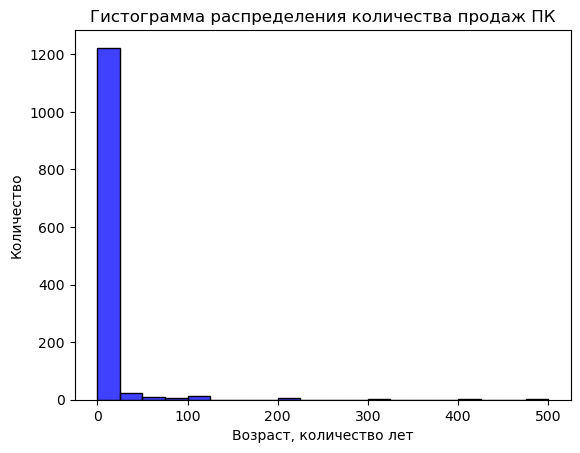

In [86]:
sns.histplot(sales, bins=20, color='blue')
plt.title('Гистограмма распределения количества продаж ПК')
plt.xlabel('Возраст, количество лет')
plt.ylabel('Количество')
plt.show()

In [87]:
# количество объектов, значения возраста по которым превышает 99 процентиль
len(df_copy[df_copy.sales_num>sales.quantile(0.99)])

11

In [88]:
# рассмотрим объекты, значения возраста по которым превышает 99 процентиль
df_copy[df_copy.sales_num>sales.quantile(0.99)].sort_values(by='sales_num', ascending=False)

,product_id,title,seller,seller_rating,manufacturer_country,sales_num,guaranty_period,cpu_cores,cpu_category,ram_type,ram_storage,hdd_size_gb,ssd_size_gb,price_rub,feedbacks_count,os_ver,gpu_type
22,20904019,Игровой Компьютер Robotcomp Аллигатор V3,Robotcomp,4.7,Россия,500,3y,6,AMD Ryzen 5,DDR 4,16,480.0,480.0,34017,128,Windows 10 Pro,AMD Radeon 7
63,25968600,Игровой Компьютер Robotcomp Старт V1,Robotcomp,4.7,Россия,500,3y,4,Intel Core i3,DDR 4,8,480.0,480.0,30760,148,windows (Trial),NVIDIA GEFORCE GT 1030
21,20904018,Игровой Компьютер Robotcomp Аллигатор V2,Robotcomp,4.7,Россия,400,3y,6,AMD Ryzen 5,DDR 4,16,480.0,480.0,32617,101,Windows 10 Pro,AMD Radeon 7
273,93548269,Игровой компьютер Life Tech Bastion,ABS-TECHNO.RU,4.4,Россия,400,3y,2,Intel Core i5,DDR 3,8,240.0,240.0,25989,189,Windows 10 Pro,NVIDIA GEFORCE GT 1030
154,70685264,Настольный Компьютер Robotcomp Orion V1,Robotcomp,4.7,Россия,300,3y,2,AMD A6,DDR 4,8,240.0,240.0,18957,66,windows (Trial),AMD Radeon R5
1,19348951,Игровой Компьютер Robotcomp М16 2.0 V1,Robotcomp,4.7,Россия,200,3y,6,Intel Core i5,DDR 4,16,960.0,960.0,76188,94,windows (Trial),NVIDIA GEFORCE GTX 1660
23,21001520,Игровой Компьютер Robotcomp Аллигатор 3.0 V1,Robotcomp,4.7,Россия,200,3y,6,AMD Ryzen 5,DDR 4,32,1000.0,512.0,40694,54,windows (Trial),AMD Radeon 7
25,21011648,Игровой Компьютер Robotcomp Аллигатор 3.0 V3,Robotcomp,4.7,Россия,200,3y,6,AMD Ryzen 5,DDR 4,32,1000.0,512.0,47827,84,Windows 10 Pro,AMD Radeon 7
132,63112869,Игровой Kомпьютер,BeastPC,4.8,Китай,200,0,6,Intel Xeon,DDR 4,16,512.0,512.0,40000,77,Windows 10,AMD Radeon 580
254,88538598,Игровой Компьютер Robotcomp Аллигатор V1,Robotcomp,4.7,Россия,200,3y,6,AMD Ryzen 5,DDR 4,16,480.0,480.0,30628,296,windows (Trial),AMD Radeon 7


In [89]:
# исключим данные наблюдения из датасета
#df_copy = df_copy[df_copy.sales_num<=sales.quantile(0.99)]
#sales = df_copy.sales_num
sales.describe()

count    1287.000000
mean        7.210567
std        32.188040
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       500.000000
Name: sales_num, dtype: float64

#### 4.1.2. 'cpu_cores'

In [90]:
df_copy.cpu_cores.describe()

count    1287.000000
mean        6.192696
std         3.810460
min         2.000000
25%         4.000000
50%         6.000000
75%         6.000000
max        24.000000
Name: cpu_cores, dtype: float64

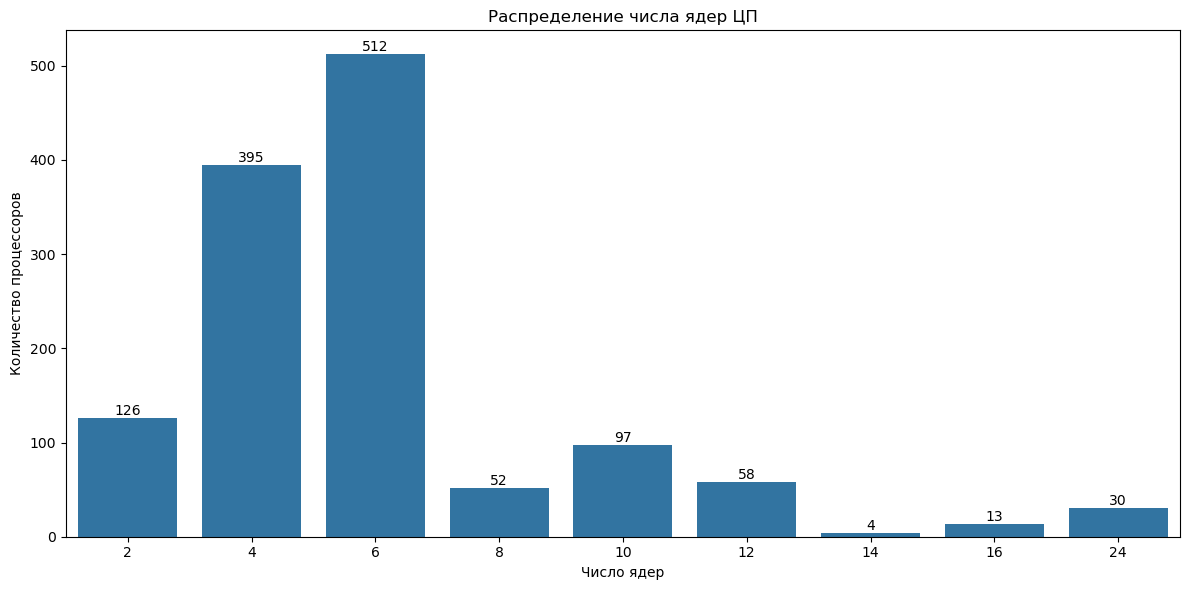

In [120]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    y=df_copy.cpu_cores.value_counts().values,
    x=df_copy.cpu_cores.value_counts().index
)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Распределение числа ядер ЦП')
plt.xlabel('Число ядер')
plt.ylabel('Количество процессоров')
#plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("pc_cpu_cores.png", format = "png", dpi=500, bbox_inches='tight')
plt.show()

#### 4.1.3. 'ram_storage'

In [92]:
df_copy.cpu_cores.describe()

count    1287.000000
mean        6.192696
std         3.810460
min         2.000000
25%         4.000000
50%         6.000000
75%         6.000000
max        24.000000
Name: cpu_cores, dtype: float64

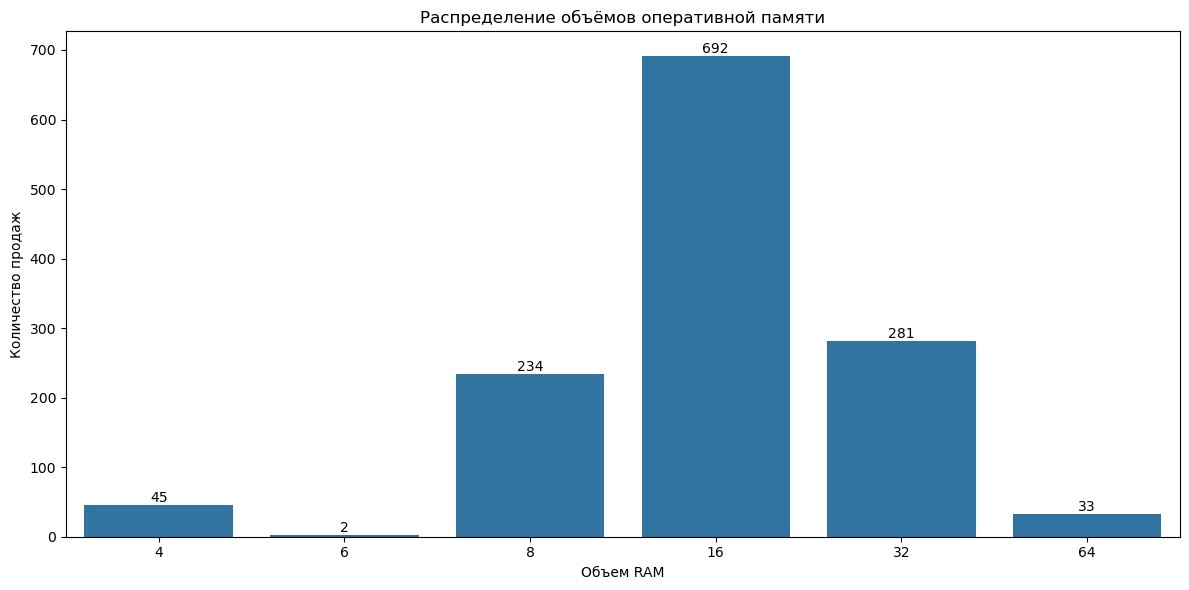

In [128]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    y=df_copy.ram_storage.value_counts().values,
    x=df_copy.ram_storage.value_counts().index
)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Распределение объёмов оперативной памяти')
plt.xlabel('Объем RAM')
plt.ylabel('Количество продаж')
plt.tight_layout()
plt.savefig("pc_ram_storage.png", format = "png", dpi=500, bbox_inches='tight')
plt.show()

#### 4.1.4. 'hdd_size_gb'

In [94]:
df_copy.hdd_size_gb.describe()

count    1287.000000
mean      675.604507
std       373.353763
min         0.000000
25%       480.000000
50%       512.000000
75%      1000.000000
max      2048.000000
Name: hdd_size_gb, dtype: float64

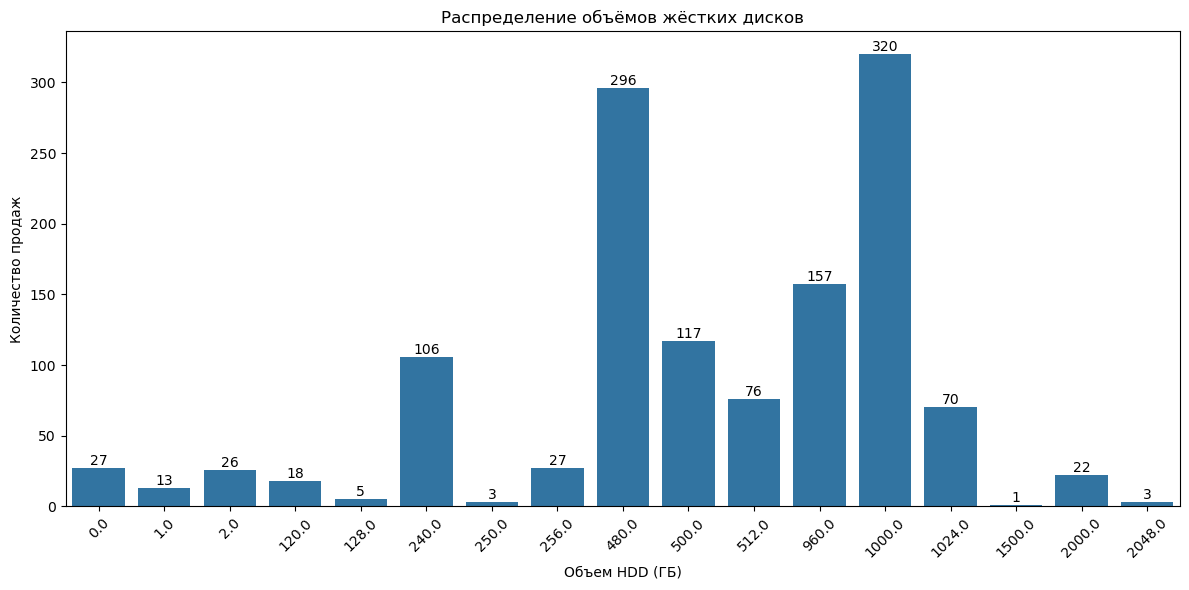

In [130]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    y=df_copy.hdd_size_gb.value_counts().values,
    x=df_copy.hdd_size_gb.value_counts().index
)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Распределение объёмов жёстких дисков')
plt.xlabel('Объем HDD (ГБ)')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("pc_hdd.png", format = "png", dpi=500, bbox_inches='tight')
plt.show()

#### 4.1.5. 'ssd_size_gb'

In [96]:
df_copy.ssd_size_gb.describe()

count    1287.000000
mean      508.048951
std       284.846599
min         0.000000
25%       256.000000
50%       480.000000
75%       512.000000
max      2048.000000
Name: ssd_size_gb, dtype: float64

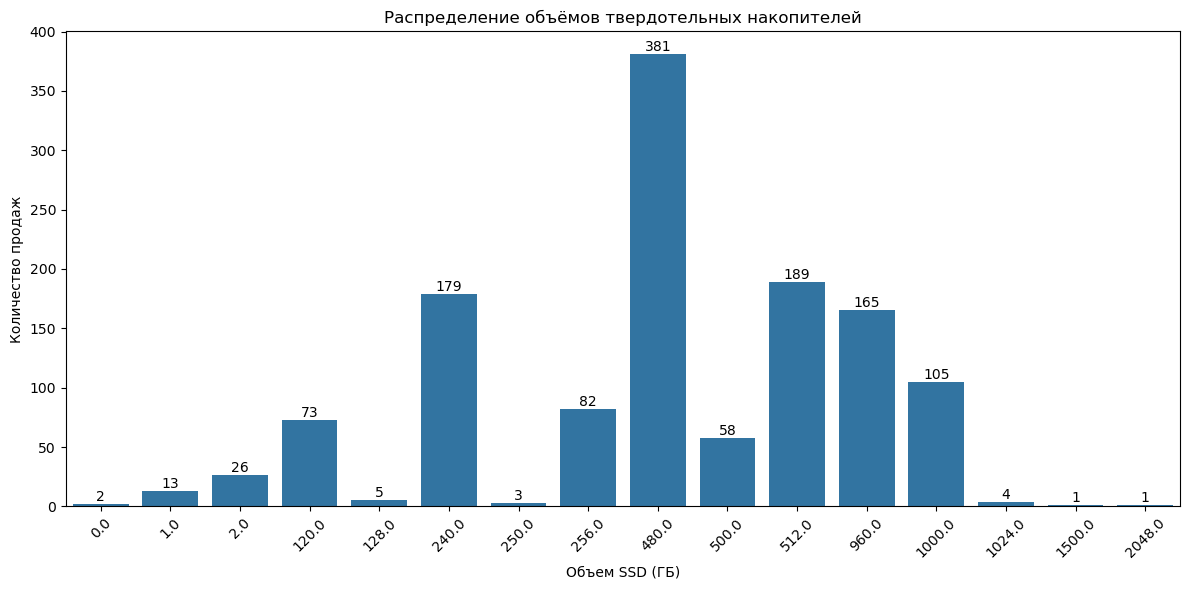

In [131]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    y=df_copy.ssd_size_gb.value_counts().values,
    x=df_copy.ssd_size_gb.value_counts().index
)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Распределение объёмов твердотельных накопителей')
plt.xlabel('Объем SSD (ГБ)')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("pc_ssd.png", format = "png", dpi=500, bbox_inches='tight')
plt.show()

#### 4.1.6. 'seller_rating'

In [98]:
max_value = df_copy.seller_rating.max()
min_value = df_copy.seller_rating.min()
mean_value = df_copy.seller_rating.mean()
median_value = df_copy.seller_rating.median()
print(f'Наибольший рейтинг: {max_value}', f'Наименьший рейтинг: {min_value}',
     f'Средний рейтинг: {mean_value}', f'Медианное значение рейтинга: {median_value}', sep='\n')

Наибольший рейтинг: 5.0
Наименьший рейтинг: 0.0
Средний рейтинг: 4.550971250971251
Медианное значение рейтинга: 4.7


In [99]:
percentile_10_value = df_copy.seller_rating.quantile(0.10)
percentile_25_value = df_copy.seller_rating.quantile(0.25)
percentile_50_value = df_copy.seller_rating.quantile(0.50)
percentile_75_value = df_copy.seller_rating.quantile(0.75)
percentile_90_value = df_copy.seller_rating.quantile(0.90)
print(f'10-й процентиль: {percentile_10_value}',
      f'25-й процентиль: {percentile_25_value}',
      f'50-й процентиль: {percentile_50_value}',
      f'75-й процентиль: {percentile_75_value}',
      f'90-й процентиль: {percentile_90_value}', sep='\n')

10-й процентиль: 4.1
25-й процентиль: 4.7
50-й процентиль: 4.7
75-й процентиль: 4.7
90-й процентиль: 4.8


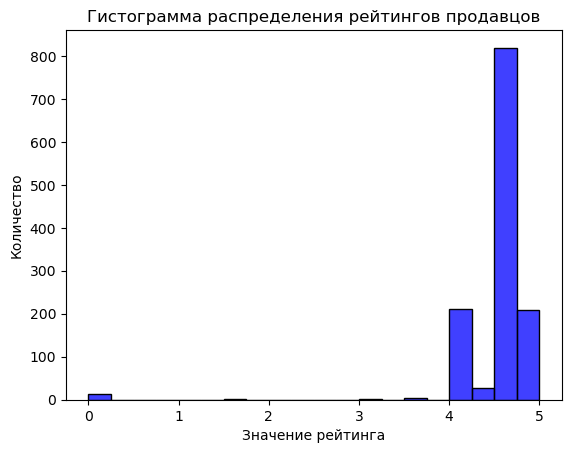

In [100]:
sns.histplot(df_copy.seller_rating, bins=20, color='blue')
plt.title('Гистограмма распределения рейтингов продавцов')
plt.xlabel('Значение рейтинга')
plt.ylabel('Количество')
plt.show()

#### 4.1.7. 'price_rub'

In [101]:
max_value = df_copy.price_rub.max()
min_value = df_copy.price_rub.min()
mean_value = df_copy.price_rub.mean()
median_value = df_copy.price_rub.median()
print(f'Наибольший рейтинг: {max_value}', f'Наименьший рейтинг: {min_value}',
     f'Средний рейтинг: {mean_value}', f'Медианное значение рейтинга: {median_value}', sep='\n')

Наибольший рейтинг: 214954
Наименьший рейтинг: 9990
Средний рейтинг: 61628.581196581195
Медианное значение рейтинга: 50671.0


In [102]:
percentile_10_value = df_copy.price_rub.quantile(0.10)
percentile_25_value = df_copy.price_rub.quantile(0.25)
percentile_50_value = df_copy.price_rub.quantile(0.50)
percentile_75_value = df_copy.price_rub.quantile(0.75)
percentile_90_value = df_copy.price_rub.quantile(0.90)
print(f'10-й процентиль: {percentile_10_value}',
      f'25-й процентиль: {percentile_25_value}',
      f'50-й процентиль: {percentile_50_value}',
      f'75-й процентиль: {percentile_75_value}',
      f'90-й процентиль: {percentile_90_value}', sep='\n')

10-й процентиль: 26880.0
25-й процентиль: 34125.0
50-й процентиль: 50671.0
75-й процентиль: 78118.5
90-й процентиль: 110186.0


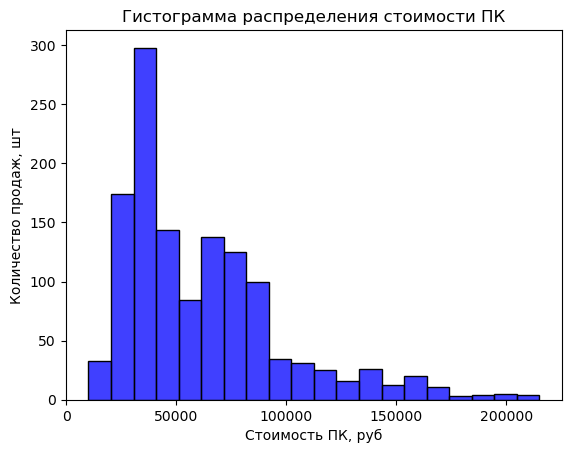

In [117]:
sns.histplot(df_copy.price_rub, bins=20, color='blue')
plt.title('Гистограмма распределения стоимости ПК')
plt.xlabel('Стоимость ПК, руб')
plt.ylabel('Количество продаж, шт')
plt.savefig("pc_cost_sales.png", format = "png", dpi=500, bbox_inches='tight')
plt.show()

### 4.2. Категориальные признаки

In [104]:
# gpu ("линейка" графического процессора)
# manufacturer_country (страна-производитель)
# cpu_category ("линейка" процессора)
# ram_type (тип оперативной памяти)
# os_ver (версия операционной системы)
# guaranty_period (срок гарантии)

#### 4.2.1. 'gpu_type'

In [105]:
df_copy.gpu_type.describe()

count             1287
unique              30
top       AMD Radeon 7
freq               166
Name: gpu_type, dtype: object

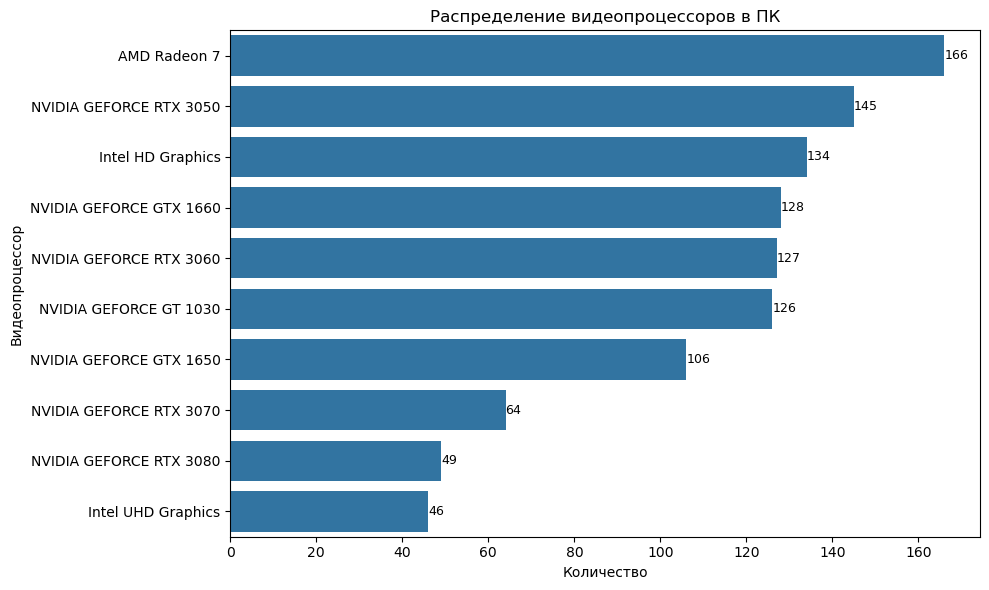

In [126]:
# Получаем top-N видеокарт (например, топ-10)
top_n = 10
value_counts = df_copy.gpu_type.value_counts().nlargest(top_n)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    y=value_counts.index,
    x=value_counts.values,
    #palette="viridis",
    #hue=value_counts.index,   # добавляем hue
    legend=False              # отключаем легенду
)

# Подписываем столбцы
ax.bar_label(ax.containers[0], fontsize=9)

# Оформление графика
plt.title('Распределение видеопроцессоров в ПК')
plt.xlabel('Количество')
plt.ylabel('Видеопроцессор')
plt.tight_layout()
plt.savefig("pc_gpu.png", format = "png", dpi=500, bbox_inches='tight')
plt.show()

#### 4.2.2. 'manufacturer_country'

In [107]:
df_copy.manufacturer_country.describe()

count       1287
unique         3
top       Россия
freq        1156
Name: manufacturer_country, dtype: object

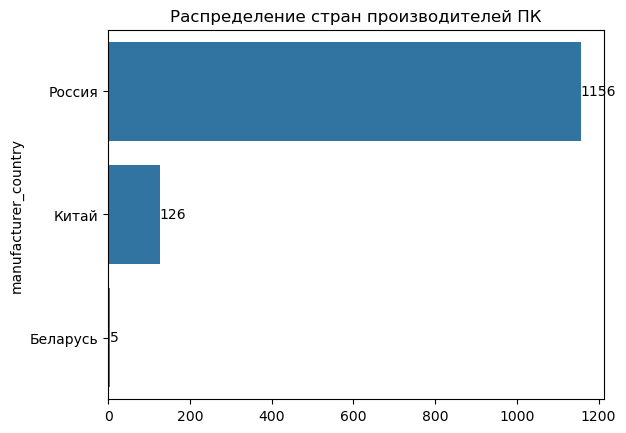

In [108]:
ax = sns.barplot(y=df_copy.manufacturer_country.value_counts().index, x=df_copy.manufacturer_country.value_counts().values)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Распределение стран производителей ПК')
plt.show()

#### 4.2.3. 'cpu_category'

In [109]:
df_copy.cpu_category.describe()

count              1287
unique               16
top       Intel Core i5
freq                397
Name: cpu_category, dtype: object

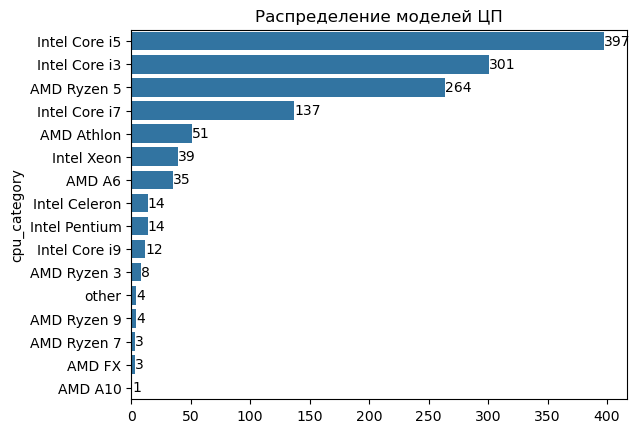

In [121]:
ax = sns.barplot(y=df_copy.cpu_category.value_counts().index, x=df_copy.cpu_category.value_counts().values)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Распределение моделей ЦП')
plt.savefig("pc_cpu_models.png", format = "png", dpi=500, bbox_inches='tight')
plt.show()

#### 4.2.4. 'ram_type'

In [111]:
df_copy.ram_type.describe()

count      1287
unique        3
top       DDR 4
freq       1088
Name: ram_type, dtype: object

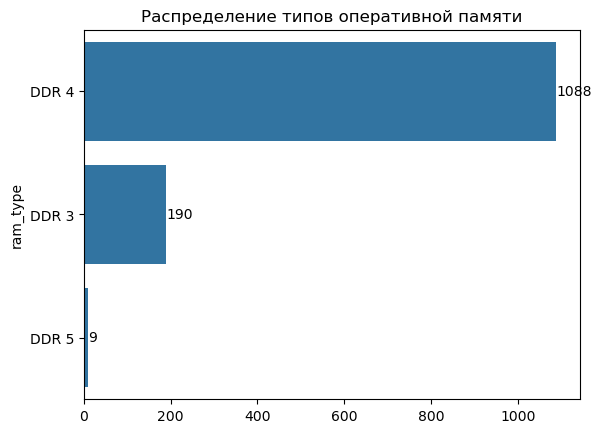

In [129]:
ax = sns.barplot(y=df_copy.ram_type.value_counts().index, x=df_copy.ram_type.value_counts().values)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Распределение типов оперативной памяти')
plt.savefig("pc_ram_type.png", format = "png", dpi=500, bbox_inches='tight')
plt.show()

#### 4.2.5. 'os_ver'

In [113]:
df_copy.os_ver.describe()

count               1287
unique                13
top       Windows 10 Pro
freq                 779
Name: os_ver, dtype: object

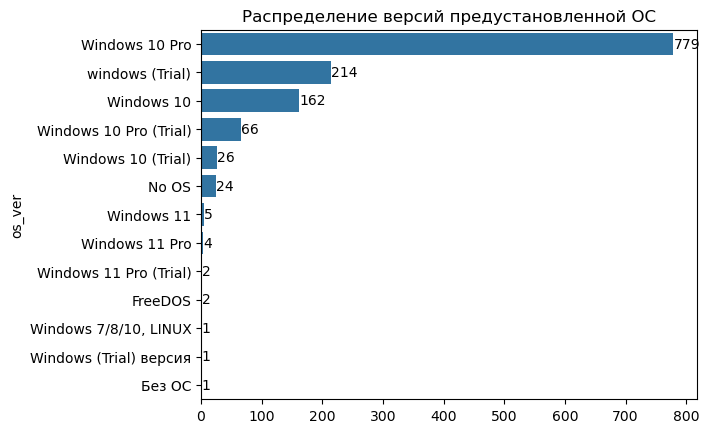

In [132]:
ax = sns.barplot(y=df_copy.os_ver.value_counts().index, x=df_copy.os_ver.value_counts().values)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Распределение версий предустановленной ОС')
plt.savefig("pc_os.png", format = "png", dpi=500, bbox_inches='tight')
plt.show()

#### 4.2.6. 'guaranty_period'

In [115]:
df_copy.guaranty_period.describe()

count     1287
unique       6
top         3y
freq       792
Name: guaranty_period, dtype: object

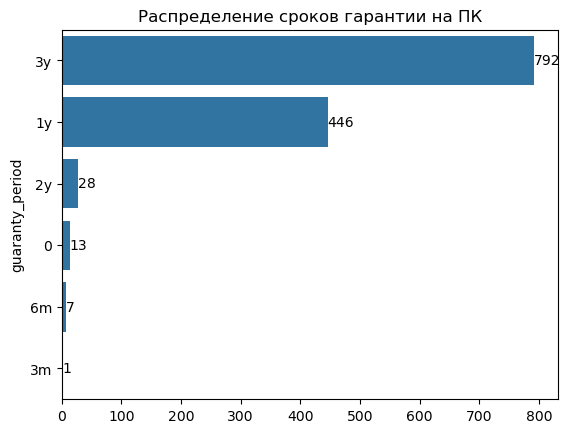

In [133]:
ax = sns.barplot(y=df_copy.guaranty_period.value_counts().index, x=df_copy.guaranty_period.value_counts().values)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Распределение сроков гарантии на ПК')
plt.savefig("pc_guarantee.png", format = "png", dpi=500, bbox_inches='tight')
plt.show()